In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['year', 'km_driven']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split the data into features and target
X = data.drop(['name', 'selling_price'], axis=1)
y = data['selling_price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


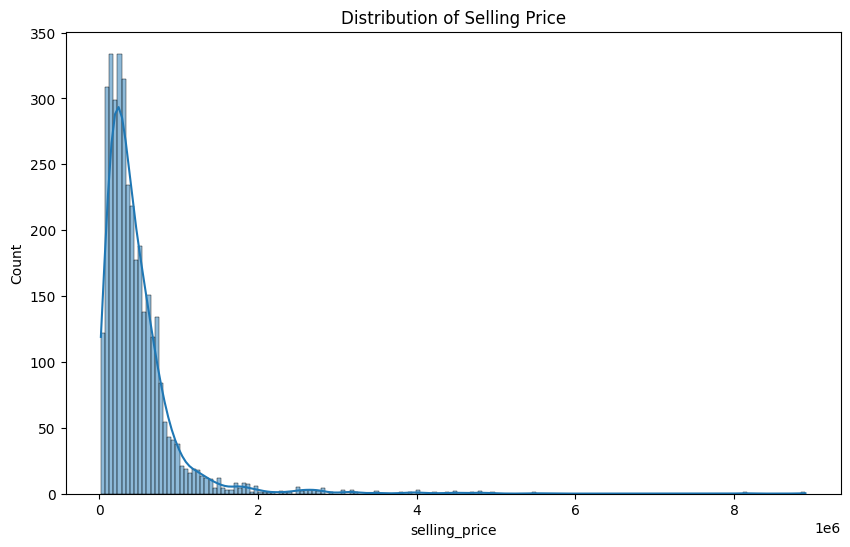

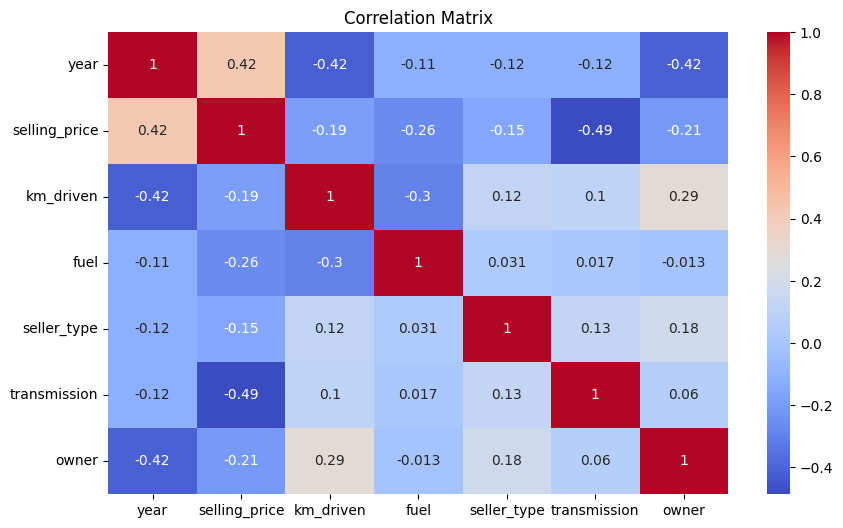

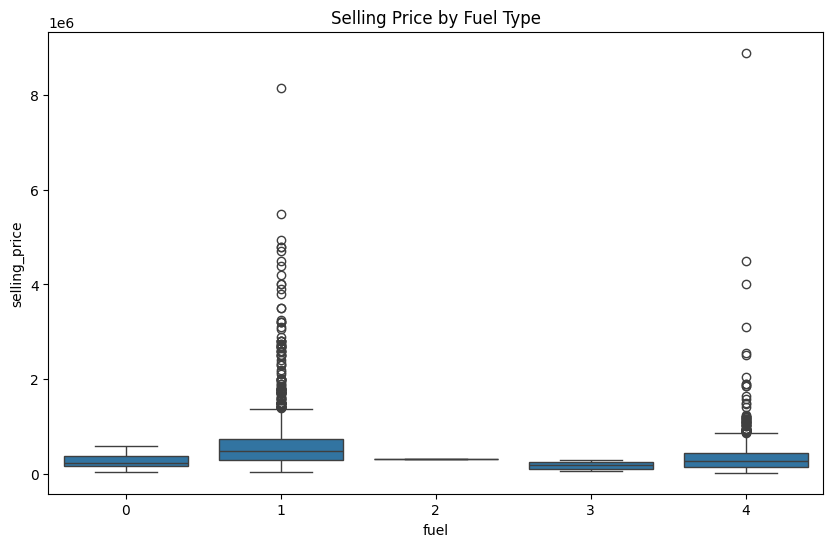

In [4]:
# Distribution of selling price
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

# Correlation matrix
# Exclude non-numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot of selling price by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=data)
plt.title('Selling Price by Fuel Type')
plt.show()

Mean Absolute Error: 193867.55927246425
Mean Squared Error: 178248828593.12296
R-squared: 0.44666137143497553


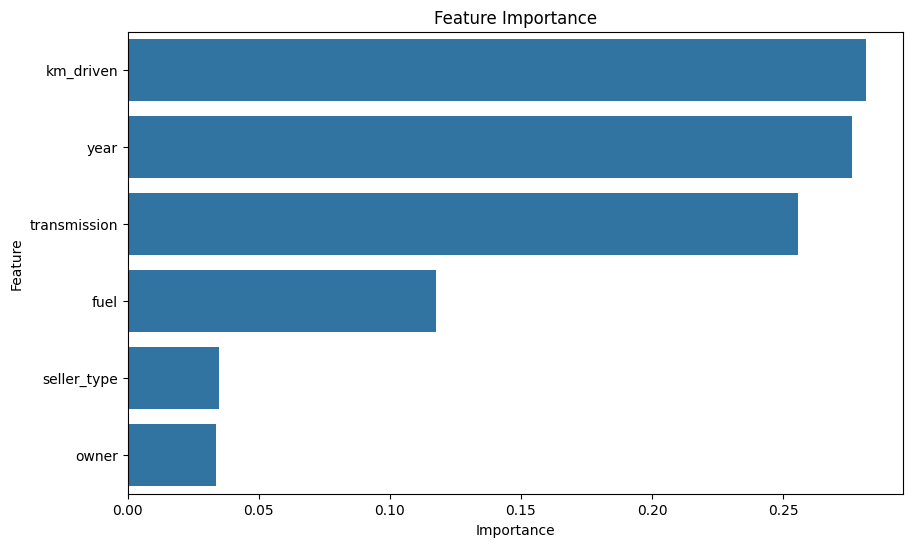

In [5]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
